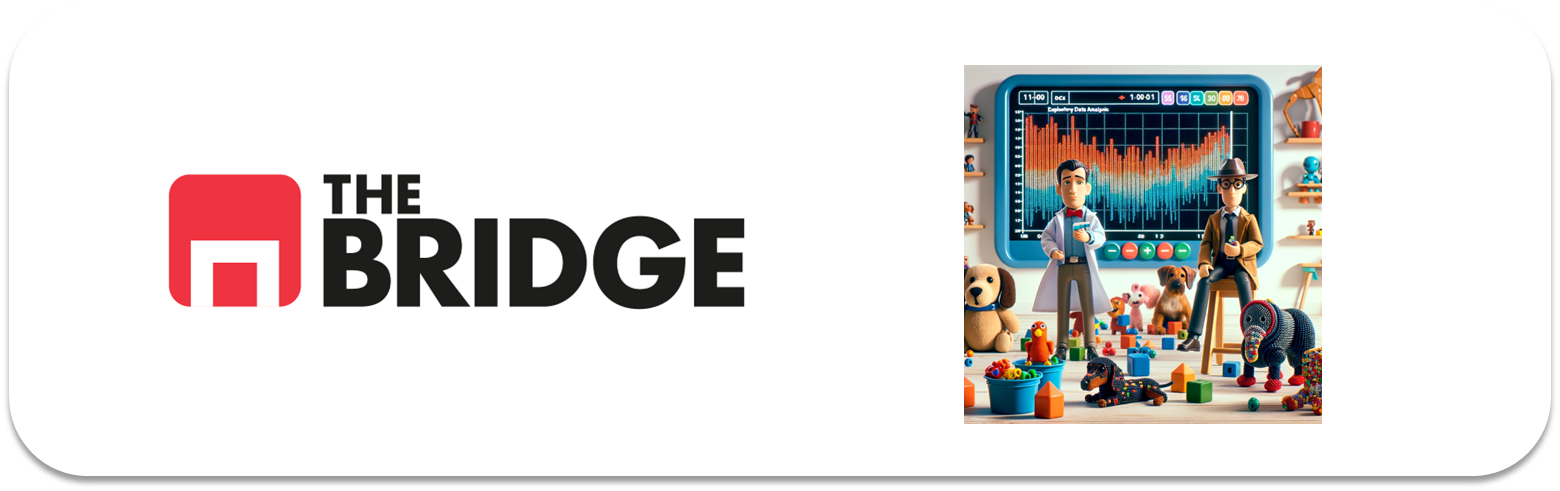

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from bootcampviztools import plot_categorical_numerical_relationship, plot_combined_graphs, \
    pinta_distribucion_categoricas, plot_grouped_boxplots, plot_categorical_relationship_fin, plot_grouped_histograms, \
        grafico_dispersion_con_correlacion, bubble_plot


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [2]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [3]:
df_titanic_copia = df_titanic.copy()

In [4]:
df_titanic.drop(columns=["deck", "survived", "pclass", "embarked"], inplace= True)

In [5]:
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [9]:
df_titanic["family_members"] = df_titanic[["parch", "sibsp"]].sum(axis=1)

In [10]:
df_titanic.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0


In [11]:
df_titanic.drop(columns=["parch", "sibsp"], inplace= True)

In [12]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [13]:
df_titanic.isna().sum()

sex                 0
age               177
fare                0
class               0
who                 0
adult_male          0
embark_town         2
alive               0
alone               0
family_members      0
dtype: int64

In [14]:
moda_embark = df_titanic["embark_town"].mode()[0]
df_titanic["embark_town"].fillna(moda_embark, inplace= True)

df_titanic["embark_town"].isna().sum()

np.int64(0)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [17]:
media_por_grupo = df_titanic.groupby("who")["age"].mean()
print(media_por_grupo)

who
child     6.369518
man      33.173123
woman    32.000000
Name: age, dtype: float64


In [18]:
def imputar_edad_por_quien(fila):
    if pd.isnull(fila["age"]):
        return media_por_grupo[fila["who"]]
    else:
        return fila["age"]

In [20]:
df_titanic["age"] = df_titanic.apply(imputar_edad_por_quien, axis=1)
df_titanic["age"].isnull().sum()

np.int64(0)

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


In [21]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0


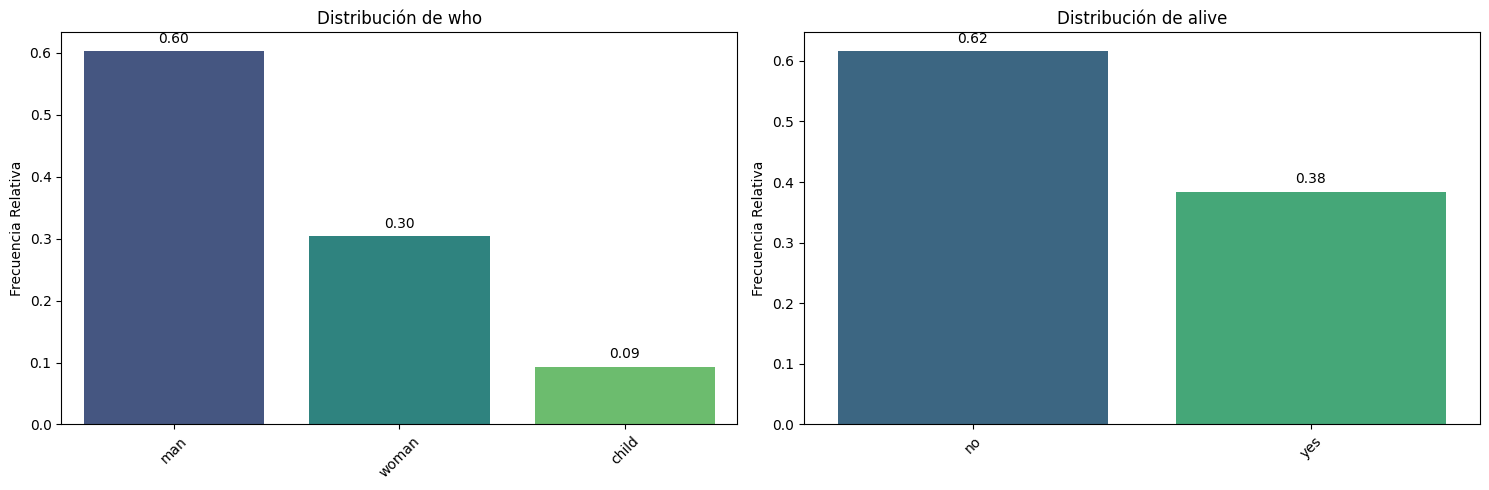

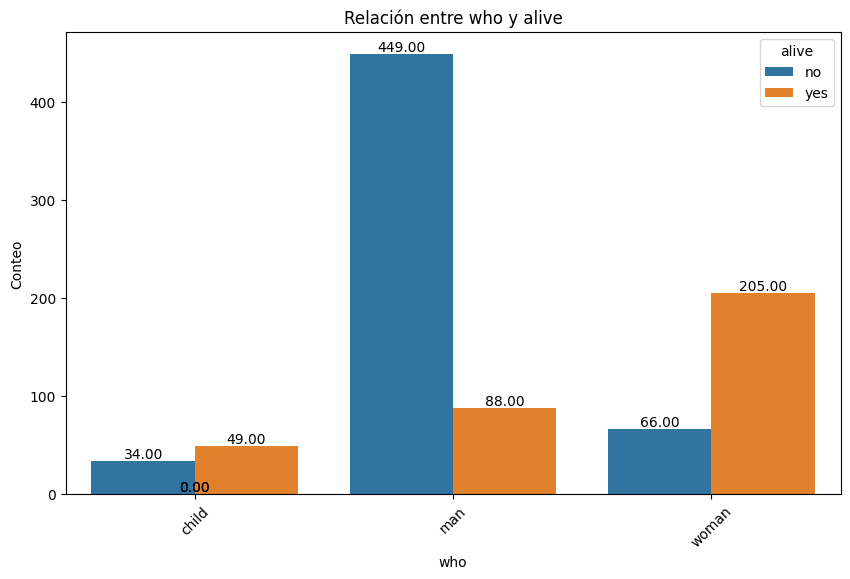

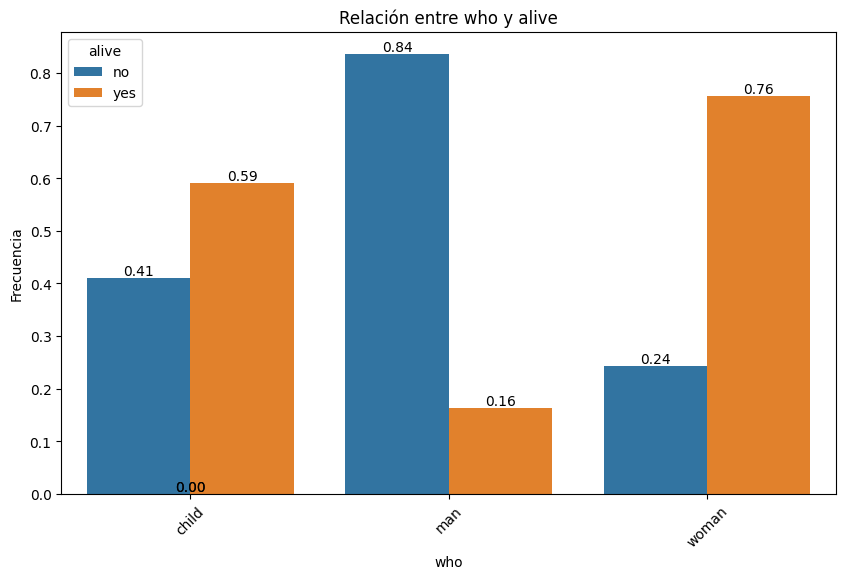

In [ ]:
# 1.-

## Sobrevivieron más adultos, mujeres o niños?
''' 
Sobreviveron más mujeres. En términos absolutos, del total de los supervivientes, 205 fueron mujeres (el 76%).
'''

pinta_distribucion_categoricas(df_titanic, ["who", "alive"], relativa = True, mostrar_valores= True)
### Abs
plot_categorical_relationship_fin(df_titanic, "who", "alive", show_values= True)
### Relativa
plot_categorical_relationship_fin(df_titanic, "who", "alive", relative_freq= True, show_values= True)

In [ ]:
## Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?
''' 
Como queremos estudiar la relación de 2 variables categóricas: Chi-cuadrado
'''

### Tabla de contingencia
tabla_contingencia = pd.crosstab(df_titanic["who"], df_titanic["alive"])
print(tabla_contingencia)


print("\n", "-"*80, "\n")

### Aplicamos el test:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

''' 
Dado que p < 0.05, podemos afirmar que hay evidencias estadísticas para concluir que 
la supervivencia depende del grupo al que se pertenecía. 
'''

alive   no  yes
who            
child   34   49
man    449   88
woman   66  205

 -------------------------------------------------------------------------------- 

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414  31.85858586]
 [330.87878788 206.12121212]
 [166.97979798 104.02020202]]


In [ ]:
## Y entre ser adulto o ser niño?
df_titanic["child_vs_adult"] = "adult"  
df_titanic.loc[df_titanic["who"] == "child", "child_vs_adult"] = "child"  

## Tabla de contingencia
tabla_niño_adulto = pd.crosstab(df_titanic["child_vs_adult"], df_titanic["alive"])
print(tabla_niño_adulto)

print("\n", "-"*80, "\n")

### Aplicamos el test:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_niño_adulto)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

''' 
Como el p-valor es < 0.05, podemos afirmar que existe una relación significativa 
entre ser niño/adulto y la supervivencia
'''


alive            no  yes
child_vs_adult          
adult           515  293
child            34   49

 -------------------------------------------------------------------------------- 

Valor Chi-Cuadrado: 15.556993340077092
P-Value: 8.005497211300105e-05
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[497.85858586 310.14141414]
 [ 51.14141414  31.85858586]]


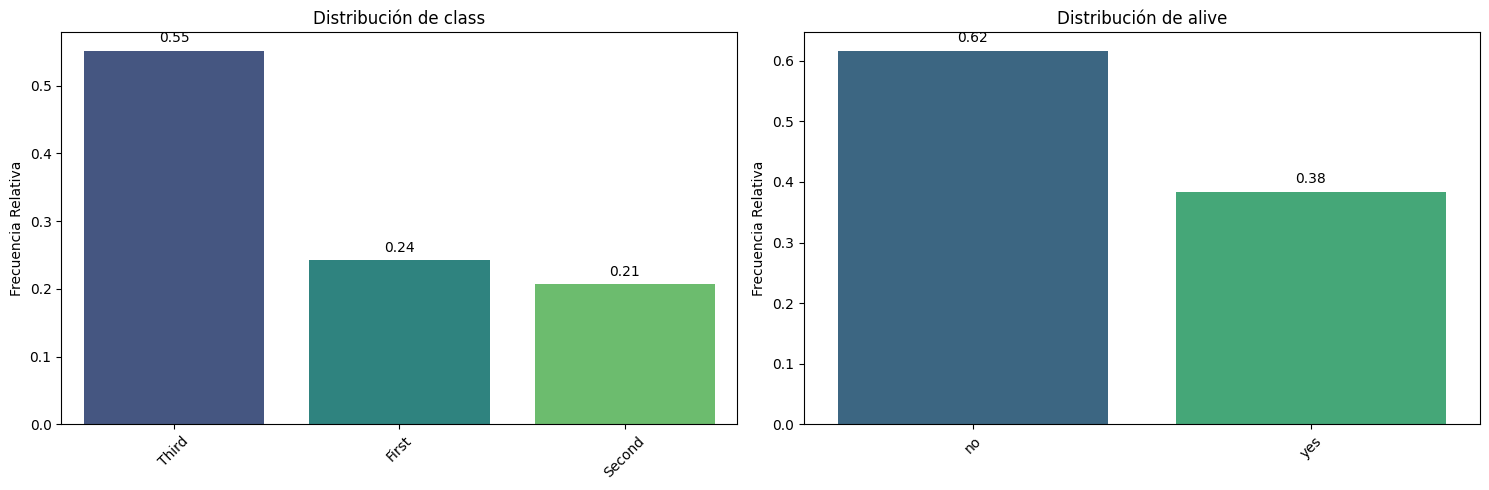

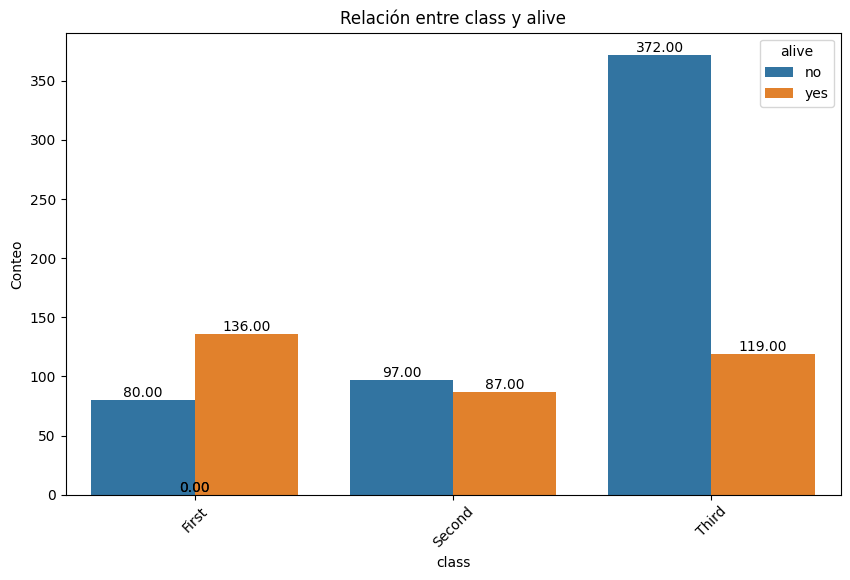

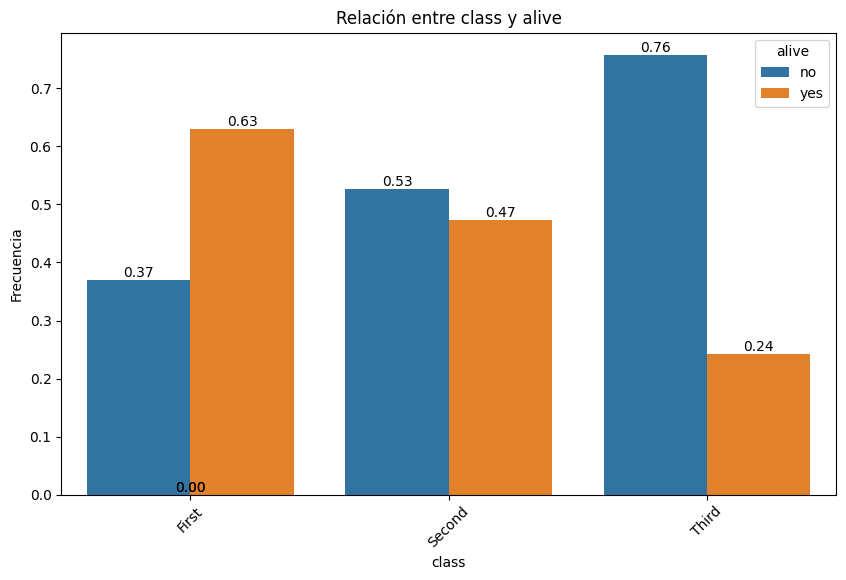

alive    no  yes
class           
First    80  136
Second   97   87
Third   372  119

 -------------------------------------------------------------------------------- 

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


' \nDado que p < 0.05, podemos afirmar que hay evidencias estadísticas para concluir que \nla supervivencia depende del grupo al que se pertenecía. \n'

In [ ]:
# 2.-

## En términos absolutos, ¿de que clase sobrevivieron más pasajeros?
pinta_distribucion_categoricas(df_titanic, ["class", "alive"], relativa = True, mostrar_valores= True)
plot_categorical_relationship_fin(df_titanic, "class", "alive", show_values= True)


# ¿ Y en términos relativos? 
plot_categorical_relationship_fin(df_titanic, "class", "alive", relative_freq= True, show_values= True)

''' 
Sobrevivieron más pasajeros que viajaban en primera clase. 136 de los pasajeros que sobrevivieron viajaban en 
primera clase (un 63%)
'''

# ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?
''' 
Como queremos estudiar la relación de 2 variables categóricas: Chi-cuadrado
'''

### Tabla de contingencia
tabla_contingencia = pd.crosstab(df_titanic["class"], df_titanic["alive"])
print(tabla_contingencia)


print("\n", "-"*80, "\n")

### Aplicamos el test:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

''' 
Dado que p < 0.05, podemos afirmar que hay evidencias estadísticas para concluir que 
la supervivencia estuvo relacionada con la clase en la que se viajaba. 
'''

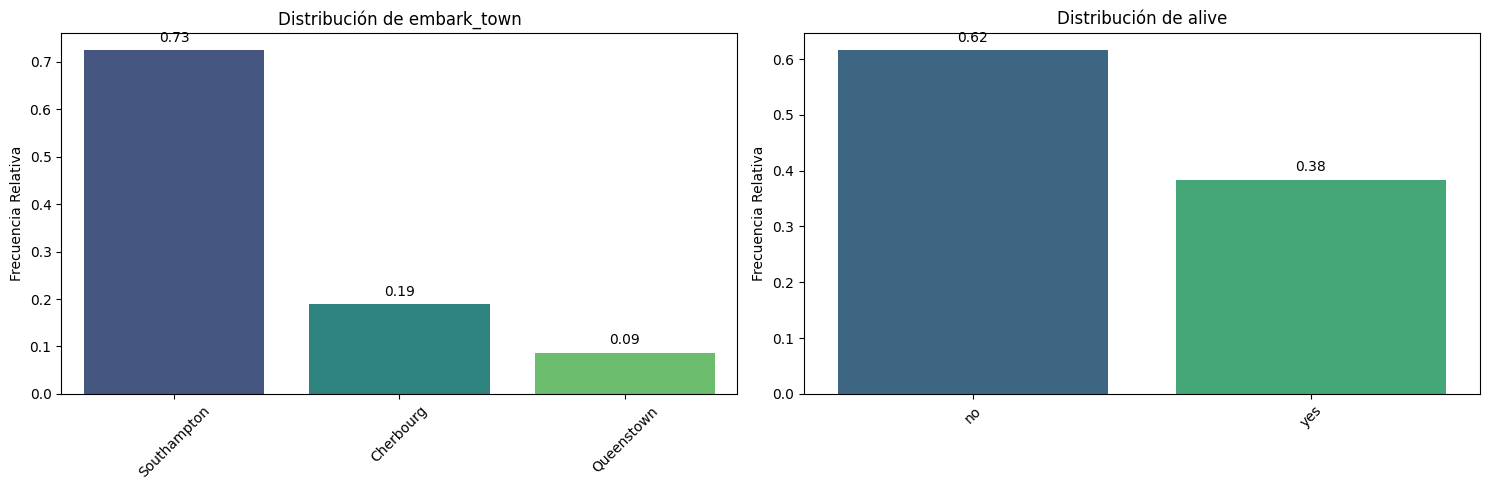

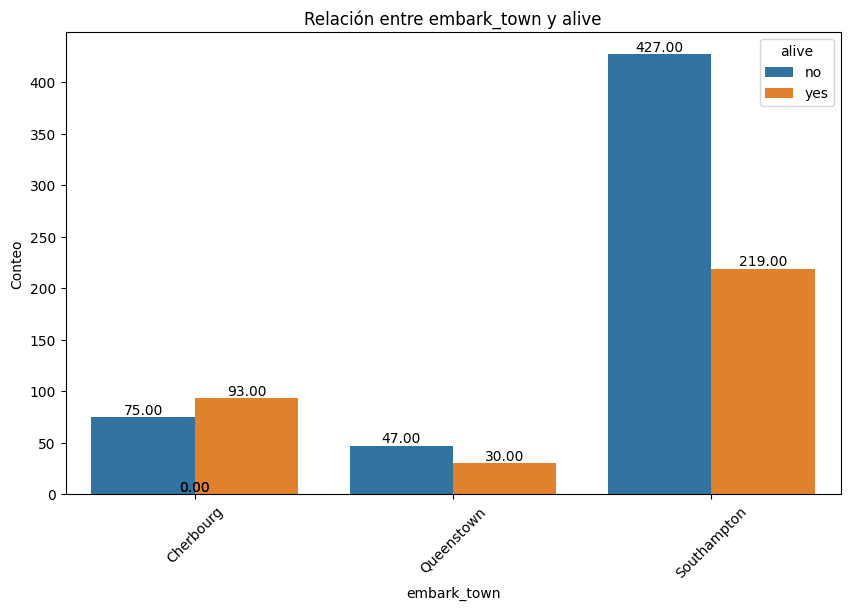

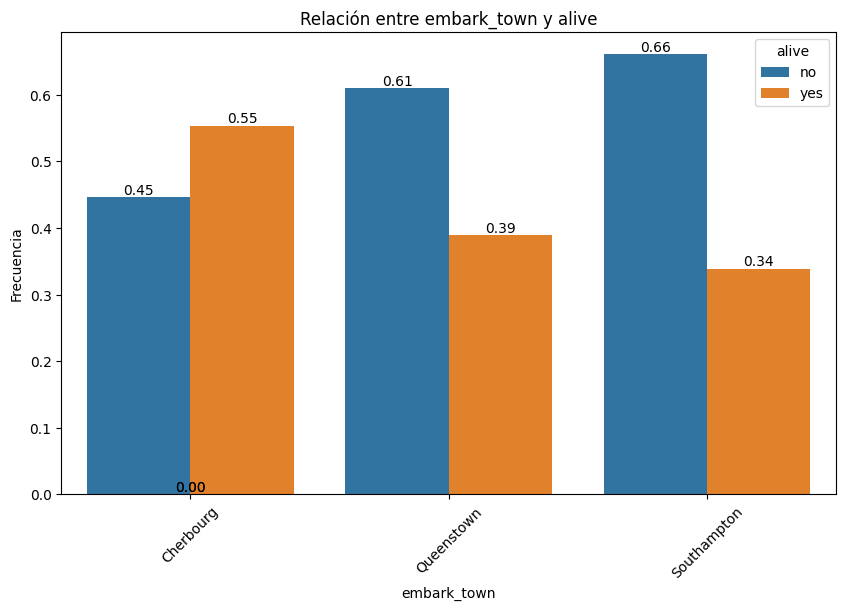

alive         no  yes
embark_town          
Cherbourg     75   93
Queenstown    47   30
Southampton  427  219

 -------------------------------------------------------------------------------- 

Valor Chi-Cuadrado: 25.964452881874784
P-Value: 2.3008626481449577e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.51515152  64.48484848]
 [ 47.44444444  29.55555556]
 [398.04040404 247.95959596]]


' \nDado que p < 0.05, podemos afirmar que hay evidencias estadísticas para concluir que \nla supervivencia estuvo relacionada con la clase en la que se viajaba. \n'

In [ ]:
# 3.-
# ¿De qué ciudad sobrevivieron más personas?
pinta_distribucion_categoricas(df_titanic, ["embark_town", "alive"], relativa = True, mostrar_valores= True)
plot_categorical_relationship_fin(df_titanic, "embark_town", "alive", show_values= True)
'''
Sobreviveron más personas de Southampton
'''

# ¿Y porcentualmente de que ciudad sobrevivieron más personas? 
plot_categorical_relationship_fin(df_titanic, "embark_town", "alive", relative_freq= True, show_values= True)
''' 
Porcentualmente, sobrevivieron más personas de Cherbourg
'''

# ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?
''' 
Como queremos estudiar la relación de 2 variables categóricas: Chi-cuadrado
'''

### Tabla de contingencia
tabla_contingencia = pd.crosstab(df_titanic["embark_town"], df_titanic["alive"])
print(tabla_contingencia)


print("\n", "-"*80, "\n")

### Aplicamos el test:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

''' 
Dado que p < 0.05, podemos afirmar que hay evidencias estadísticas para concluir que 
la supervivencia estuvo relacionada con el origen de embarque. 
'''

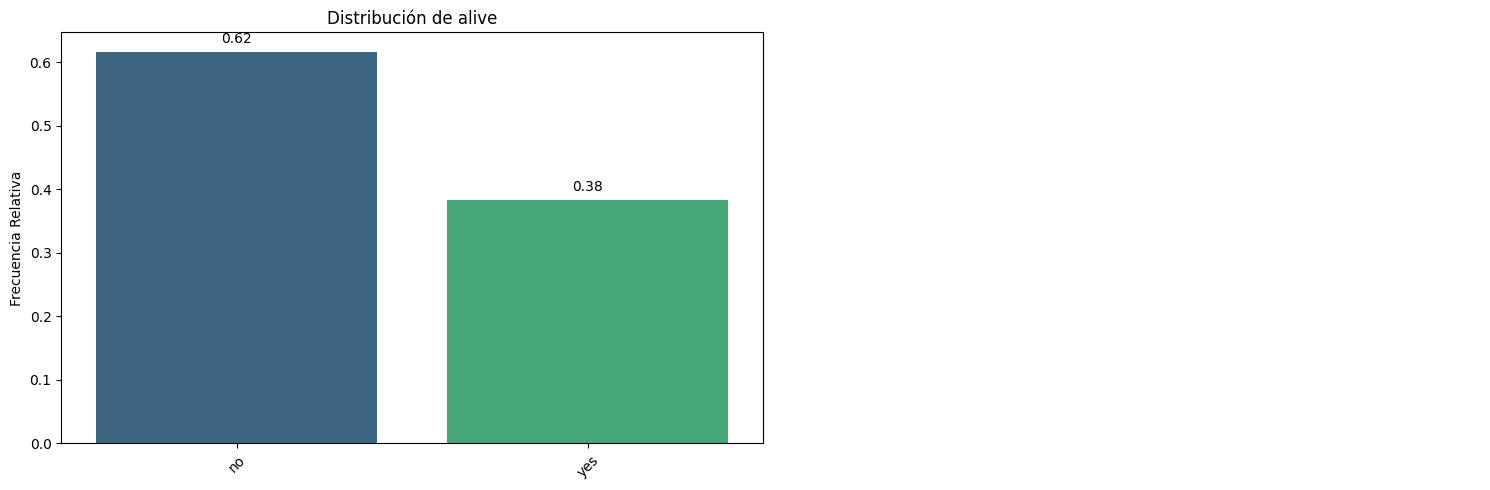

(2,)


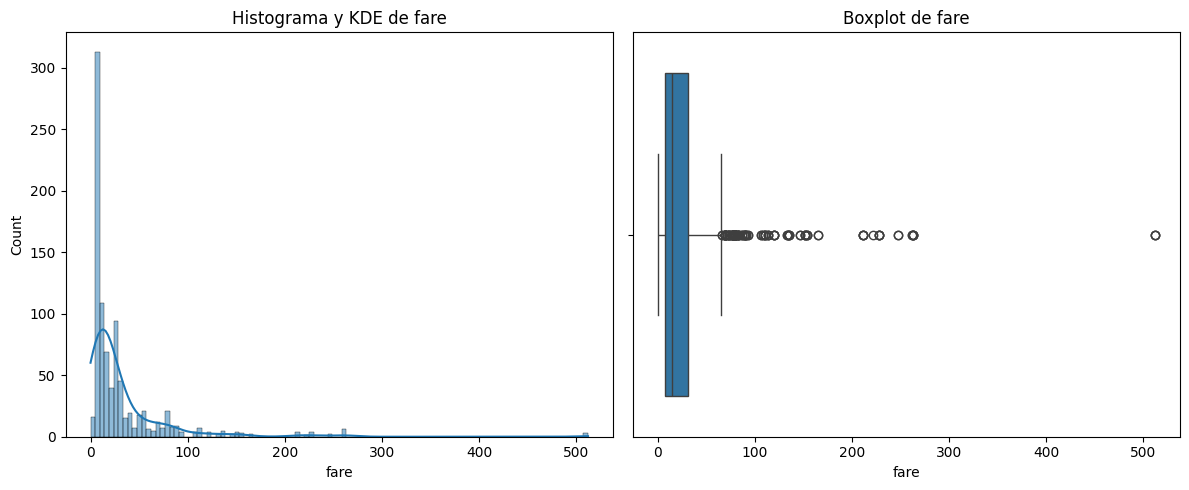

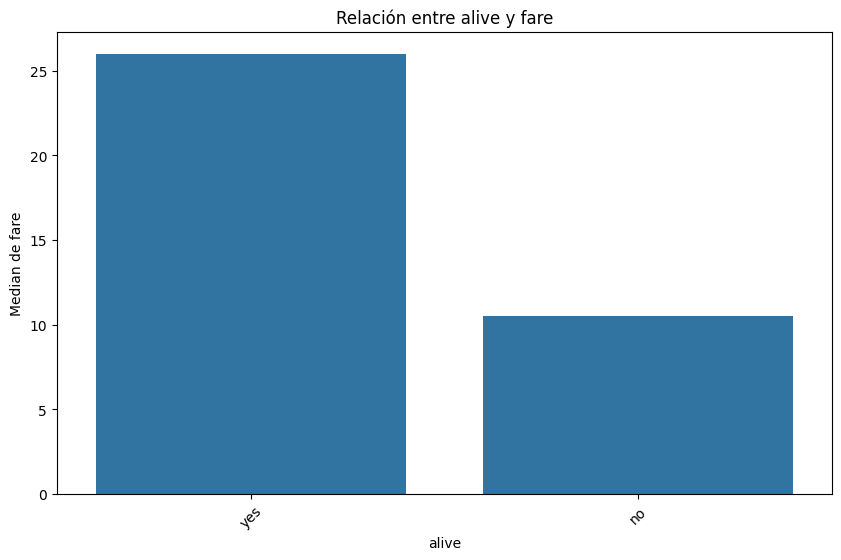

In [ ]:
# 4.- ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?
pinta_distribucion_categoricas(df_titanic, ["alive"], relativa= True, mostrar_valores= True)
plot_combined_graphs(df_titanic, ["fare"])
plot_categorical_numerical_relationship(df_titanic, "alive", "fare", measure= "median")

''' 
Los pasajeros que sobrevivieron pagaron, en general, un precio más alto por su billete. 
Esto sugiere que haber pagado más estuvo asociado a mayores probabilidades de supervivencia, 
posiblemente porque los pasajeros de clases superiores (que pagaban más) tenían más facilidades para llegar a los botes salvavidas
'''

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

In [46]:
# 5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? 
pasajeros_gratis = df_titanic.loc[df_titanic["fare"] == 0]
print(pasajeros_gratis)

print("\n", "-"*80, "\n")

print(df_titanic.loc[df_titanic["fare"] == 0, ["sex", "age", "class", "who", "embark_town", "alive"]])

print("\n", "-"*80, "\n")

# ¿Qué ocurrió con la persona que más dinero se dejó?
print(df_titanic.loc[df_titanic["fare"] == df_titanic["fare"].max()])

      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  33.173123   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  33.173123   0.0  Second  man        True  Southampton    no   True   
466  male  33.173123   0.0  Second  man        True  Southampton    no   True   
481  male  33.173123   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  33.173123   0.0   First  man        True  Southampton    no   True   
674  male  33.173123   0.0  Second  man        True  Southampton    no   True   
732  male  33.173123   0.0  


Ciudad: Southampton


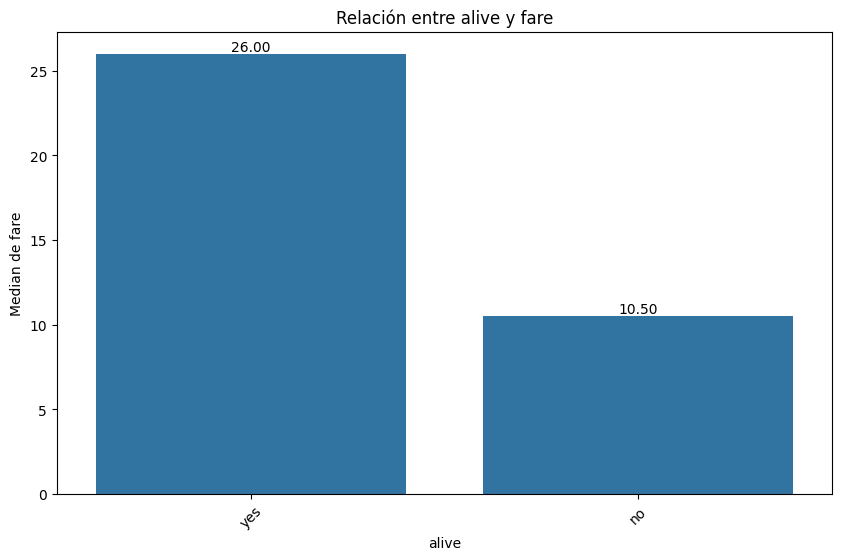


Ciudad: Cherbourg


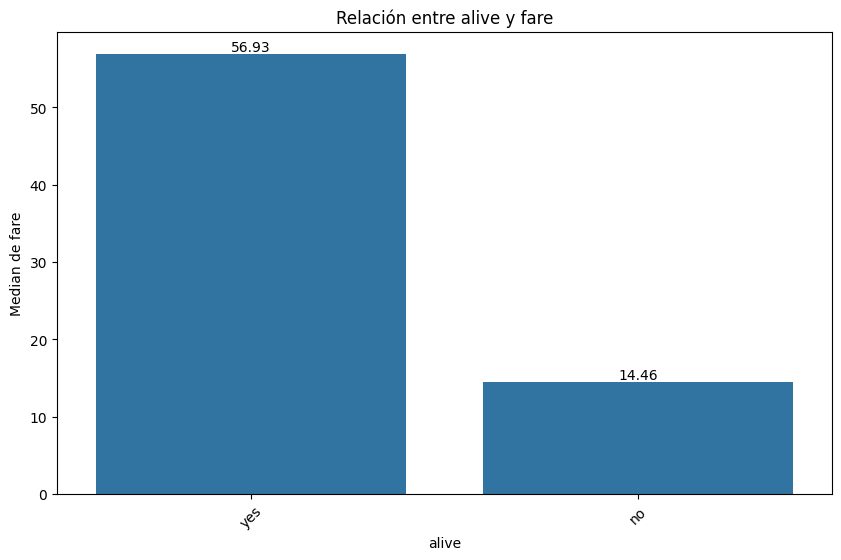


Ciudad: Queenstown


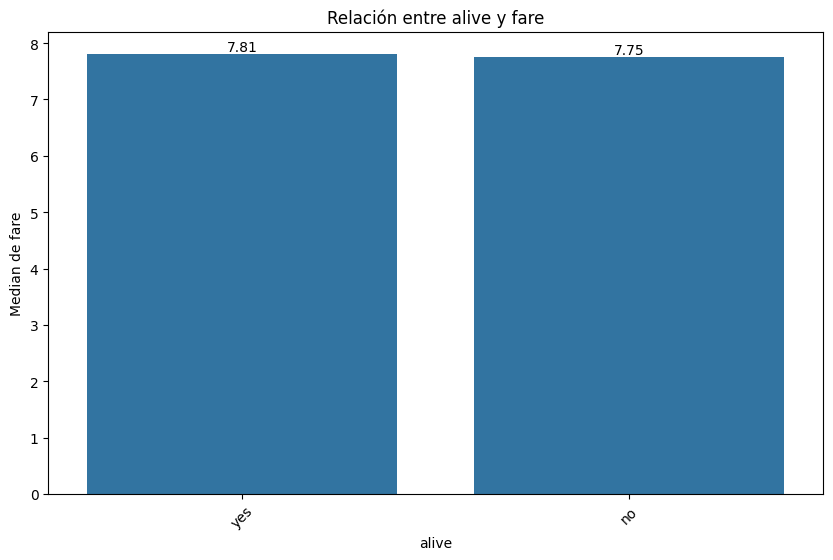

In [ ]:
# 6.-
## Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. 
###No necesitas aplicar ningún test, muestralo numérica o visualmente.

col_directora = "embark_town"
col_1 = "fare"
col_2 = "alive"


diccionario_multivariante = {}
for valor in df_titanic[col_directora].unique():
    diccionario_multivariante[valor] = df_titanic.loc[df_titanic[col_directora] == valor, [col_1, col_2]]

for ciudad, df_sub in diccionario_multivariante.items():
    print(f"\nCiudad: {ciudad}")
    plot_categorical_numerical_relationship(df_sub, "alive", "fare", measure="median", show_values=True)

''' 
Aparentemente, sí. Excepto en Queenstown, hay una mayor proporción de supervivientes en los grupos que pagaron precios 
más altos
'''


In [48]:
# 7.- Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. 
## ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?
df_titanic["grupo_clase_edad"] = df_titanic["class"] + " - " + df_titanic["child_vs_adult"]
df_titanic["grupo_clase_edad"].unique()

array(['Third - adult', 'First - adult', 'Third - child',
       'Second - child', 'Second - adult', 'First - child'], dtype=object)

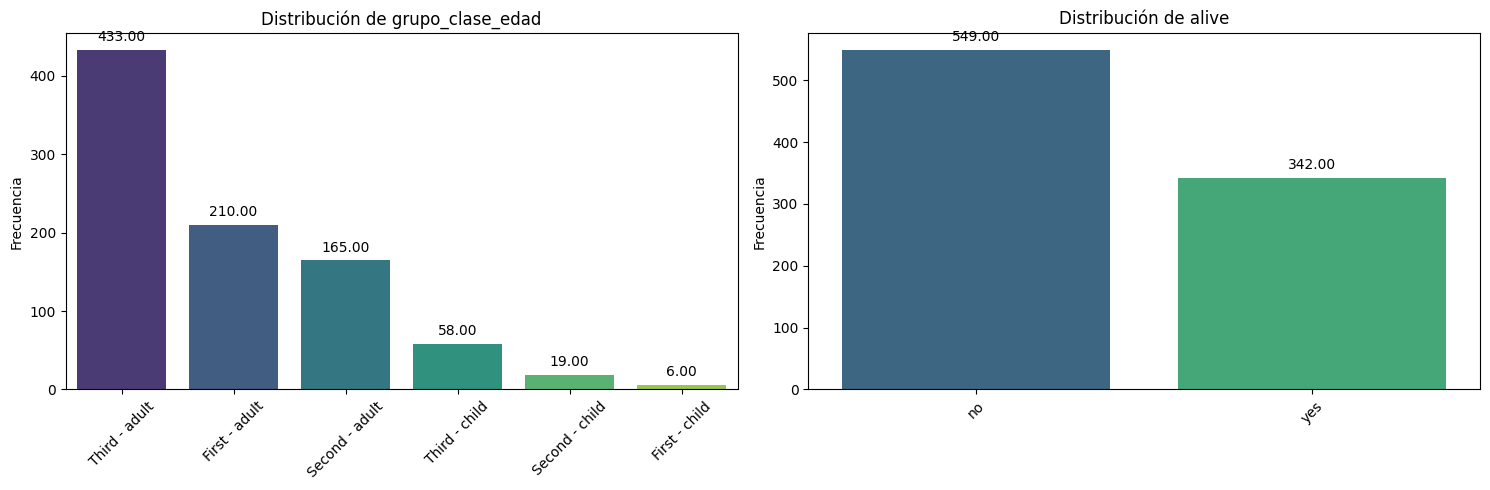

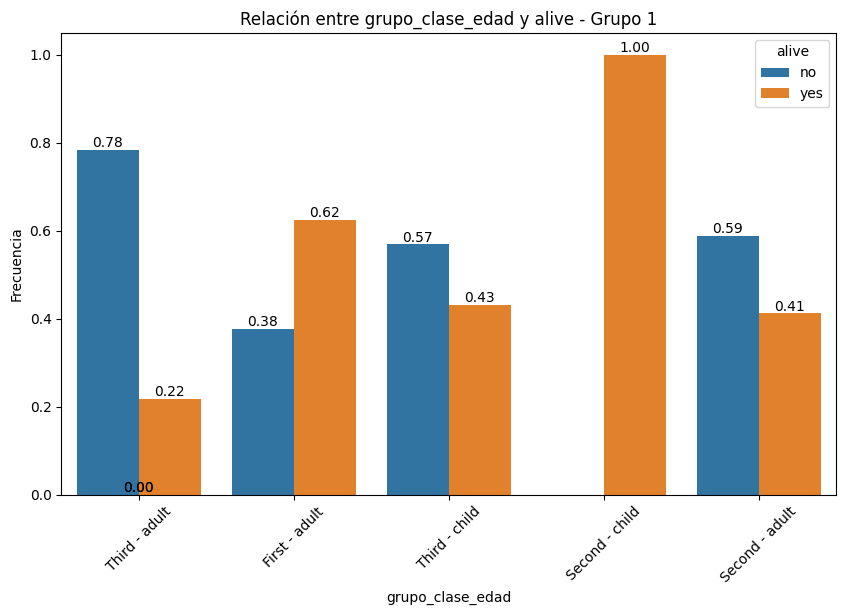

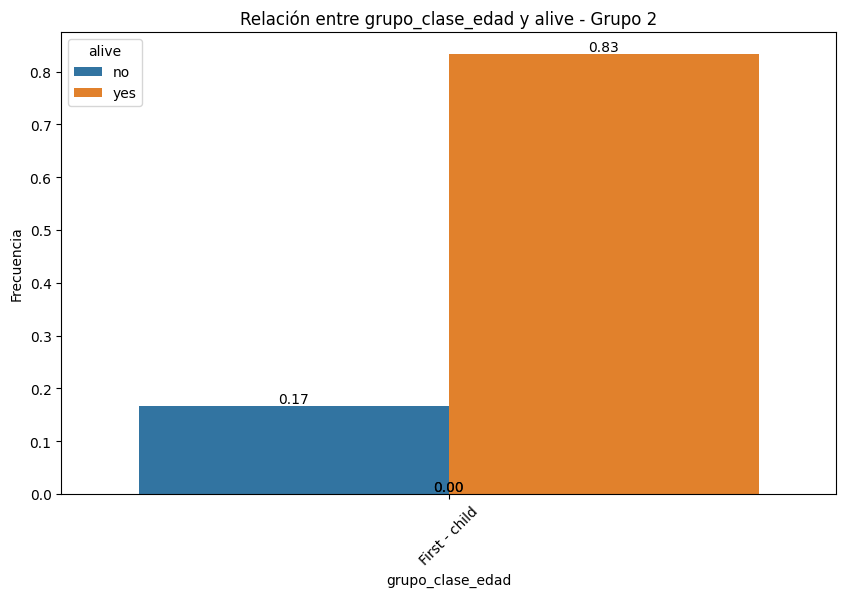

In [ ]:
### Distribuciones absolutas y relativas de supervivencia por grupo combinado
pinta_distribucion_categoricas(df_titanic, ["grupo_clase_edad", "alive"], mostrar_valores=True)
plot_categorical_relationship_fin(df_titanic, "grupo_clase_edad", "alive", relative_freq=True, show_values=True)

''' 
En términos relativos, los niños en segunda clase (Second - child) fueron los más favorecidos con un 100% de supervivencia.
En términos absolutos, los adultos de primera clase (First - adult) concentraron la mayor cantidad de personas que sobrevivieron.
Esto puede significar que la clase social y la edad influyeron en la probabilidad de sobrevivir
'''

In [51]:
df_titanic.head()

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,child_vs_adult,grupo_clase_edad
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,adult,Third - adult
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,adult,First - adult
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,adult,Third - adult
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,adult,First - adult
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,adult,Third - adult


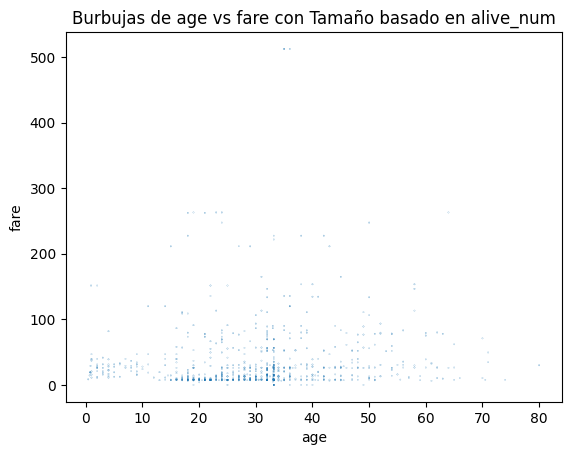

In [ ]:
# 8.- Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. 
## ¿Qué puedes decir al respecto?

df_titanic["alive_num"] = 0
df_titanic.loc[df_titanic["alive"] == "yes", "alive_num"] = 1

bubble_plot(df_titanic, "age", "fare", "alive_num", scale=20)


## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [58]:
df_air_jun = pd.read_csv("./data/dataset_viajes_jun.csv")
df_air_jun.head()

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


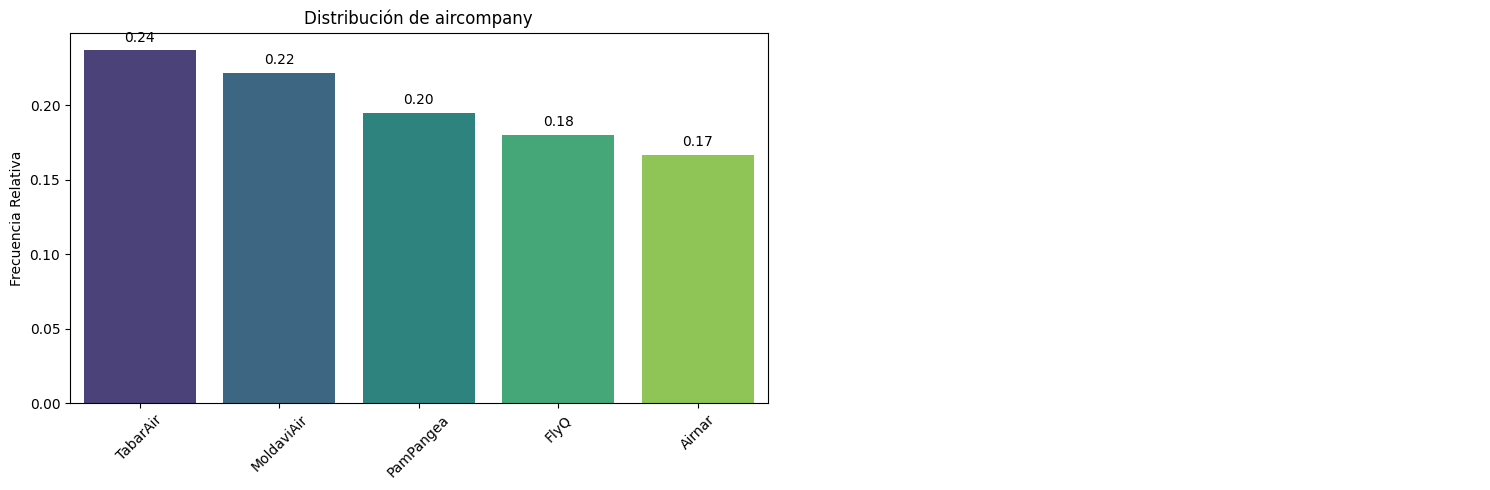

In [59]:
pinta_distribucion_categoricas(df_air_jun, ["aircompany"], relativa=True, mostrar_valores=True)

(2,)


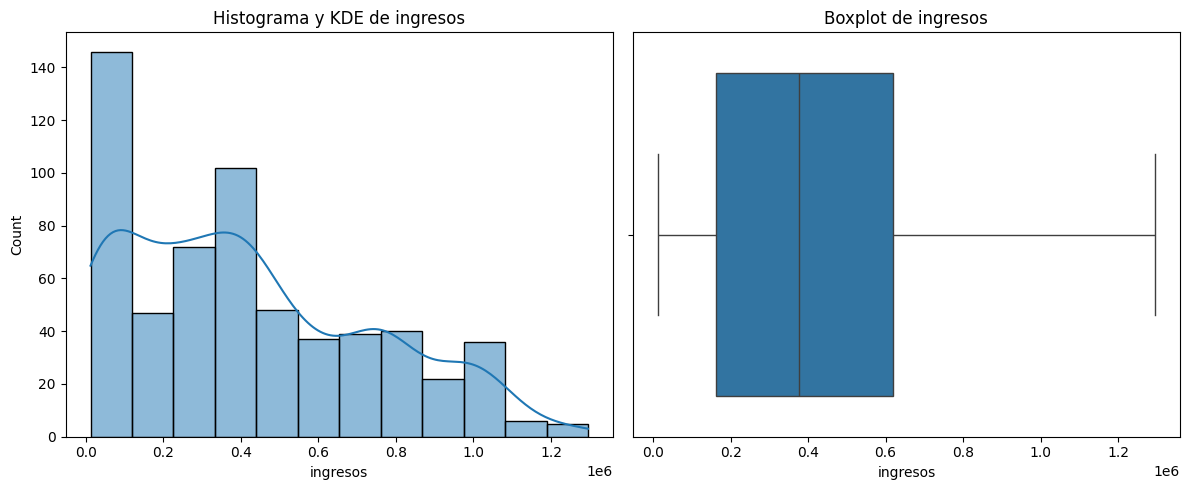

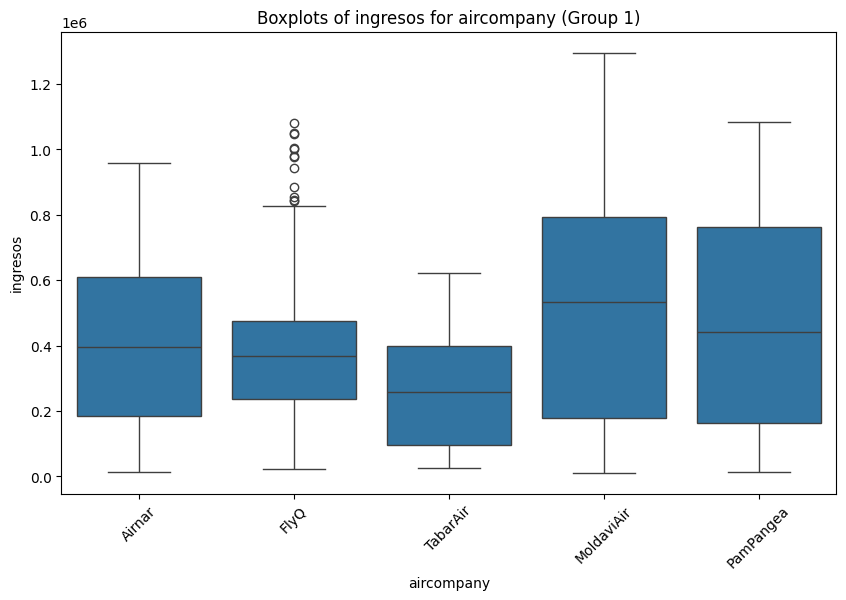

In [60]:
# Visualización de ingresos por compañía
plot_combined_graphs(df_air_jun, ["ingresos"])
plot_grouped_boxplots(df_air_jun, "aircompany", "ingresos")

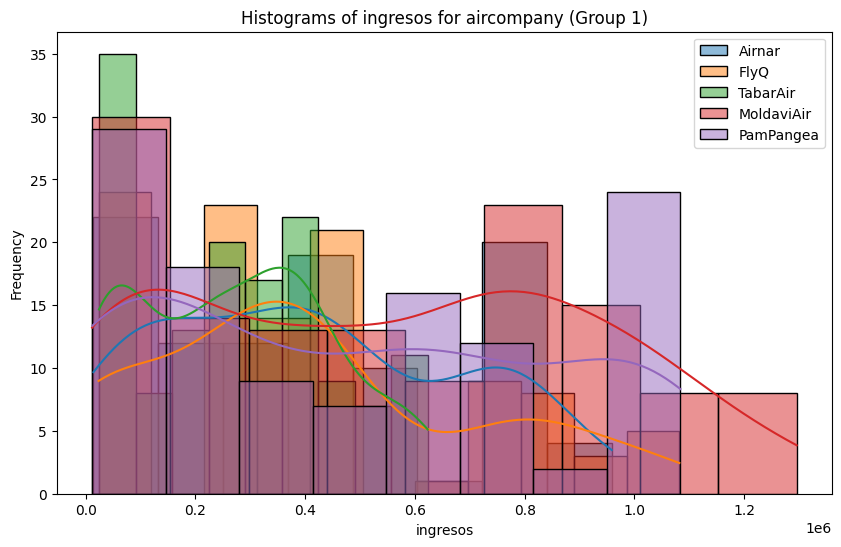

In [61]:
plot_grouped_histograms(df_air_jun, "aircompany", "ingresos", 5)

In [ ]:
''' 
TabarAir es la aerolínea con mayor número de vuelos, pero con ingresos más bajos en mediana y rango
'''

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


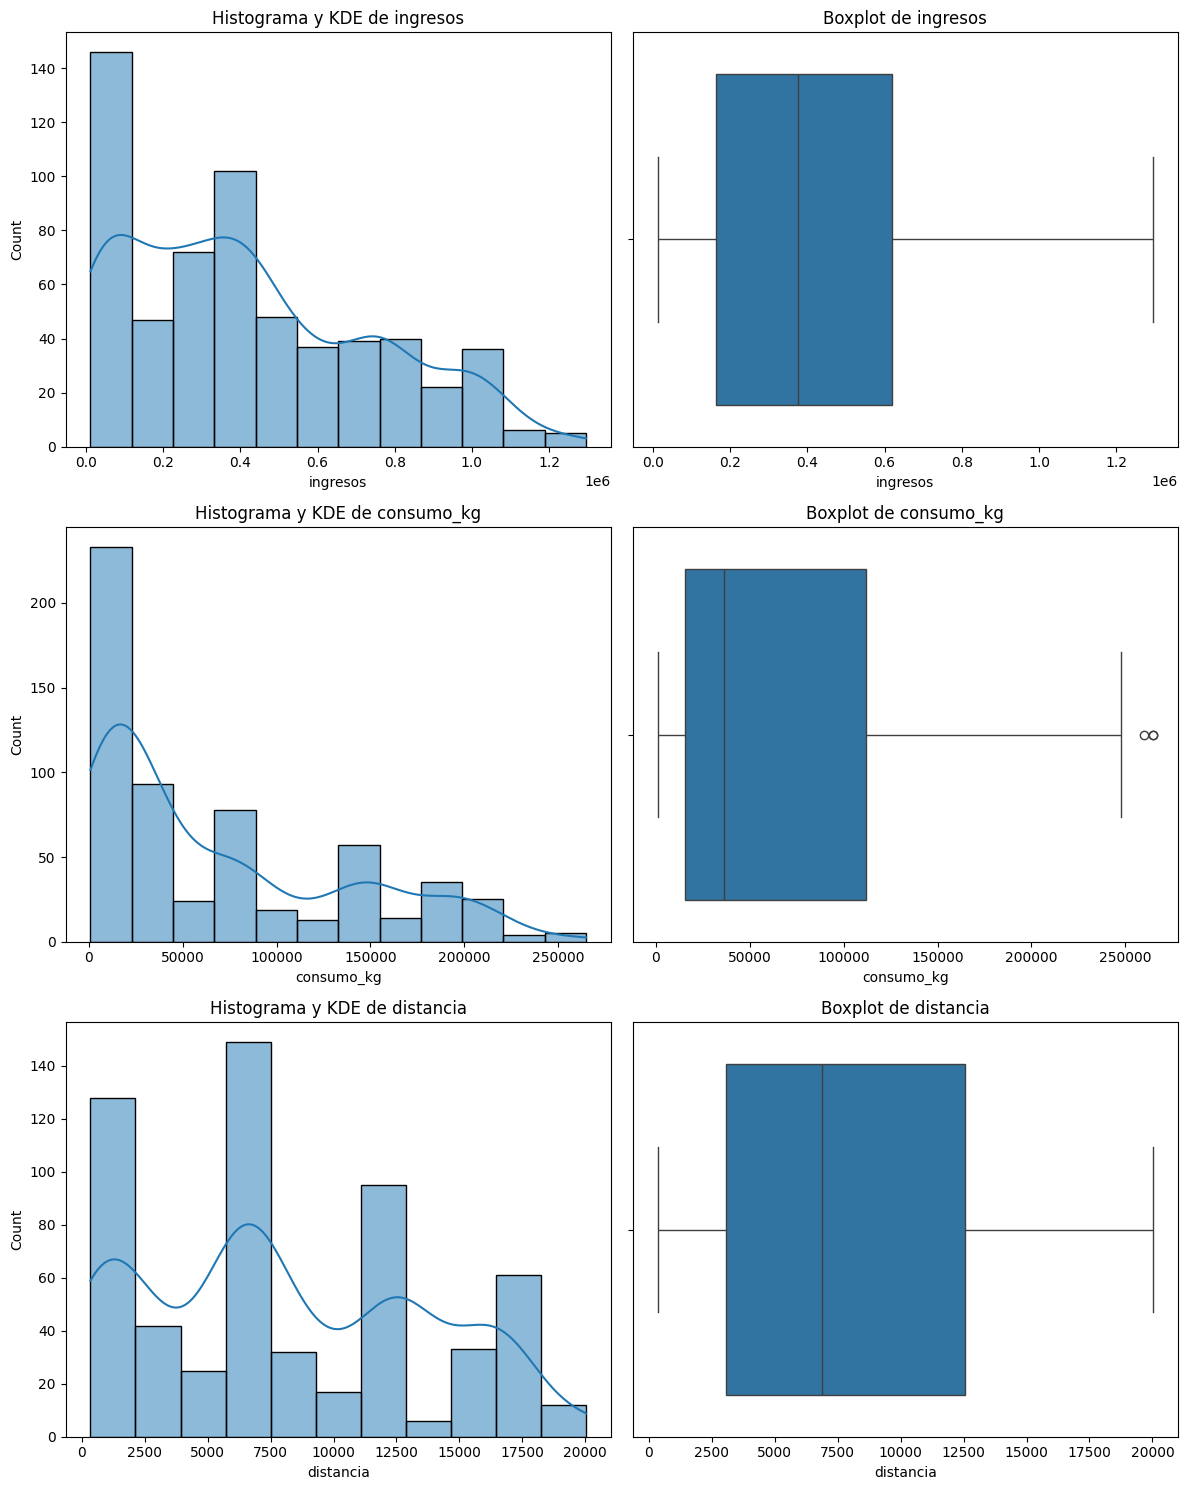

In [62]:
plot_combined_graphs(df_air_jun, ["ingresos", "consumo_kg", "distancia"])

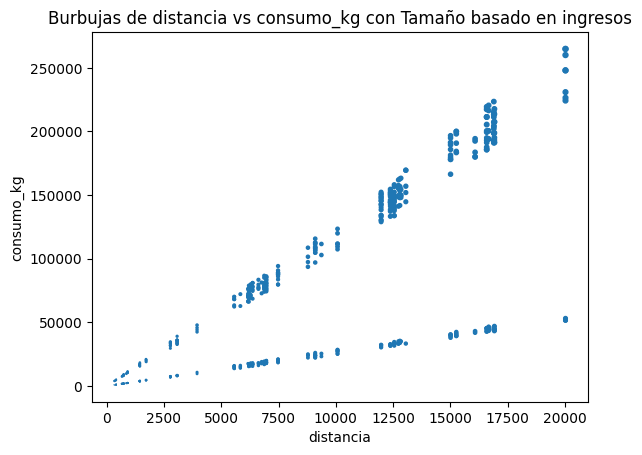

In [ ]:
bubble_plot(df_air_jun, "distancia", "consumo_kg", "ingresos", scale=100000)
''' 
Se identifican dos patrones:
- Una nube con distancia y consumo altos, pero con burbujas no necesariamente más grandes
- Otra más baja en distancia y consumo, con burbujas de tamaño similar
Esto sugiere que existen vuelos más eficientes, que generan ingresos similares con menos consumo
'''


### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(2,)


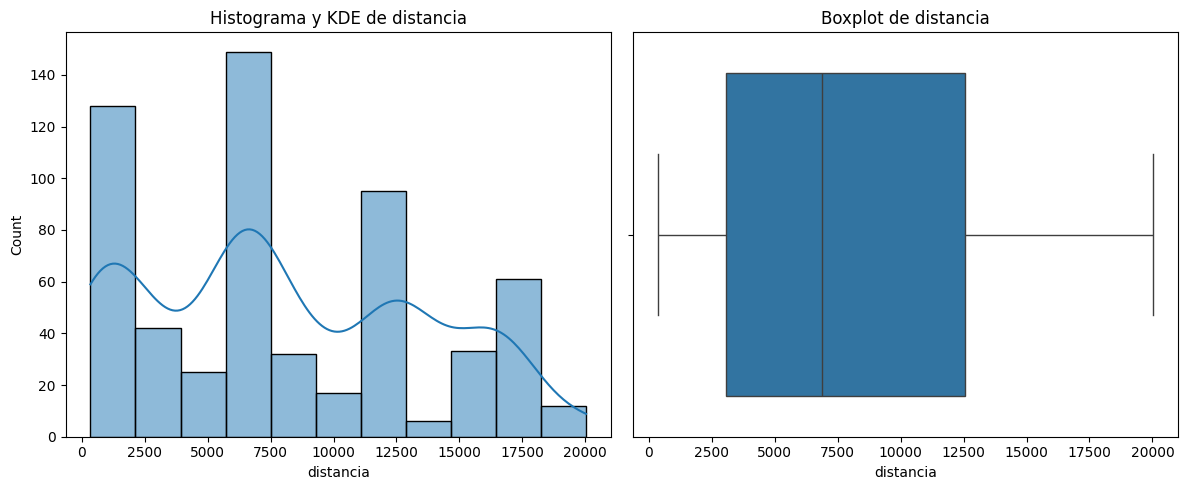

In [66]:
plot_combined_graphs(df_air_jun, ["distancia"])

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.